In [1]:
import pandas as pd

Aanpassen bij complete run

- g2p_lexicon ->  filter woorden die ik gebruik in dit experiment, 
- pcu_lexicon -> filter woorden die ik gebruik in dit experiment, vervang /G/ voor /x/

# INPUTS - Language Resources

Phonetic transcriptions of DART data

In [2]:
with open('/vol/tensusers5/wharmsen/ASTLA/manual-annotation-prep/dart-preposttest-lexicon.txt', 'r') as f:
    lexicon = [line.replace('\n', '').split('\t') for line in f.readlines()]

lexicon_dict = pd.DataFrame(lexicon).set_index(0)
lexicon_dict.loc['bal', 1]

'b A l'

PCU Lexicon

In [3]:
# pcu_lexicon = pd.read_csv('/vol/tensusers5/wharmsen/spelling-data/graph_phon_alignment_lexicon.csv', converters={
#                                                            'word_graph_align': eval,
#                                                            'word_phon_align': eval})

# def getPCUS(pcu_lexicon, prompt):
#     try: 
#         selected_row = pcu_lexicon[pcu_lexicon['word_graph'] == prompt].reset_index()
#         pcus_aligned = selected_row.loc[0,'word_graph_align']
#         phonemes_aligned = selected_row.loc[0,'word_phon_align']
#         return pcus_aligned, phonemes_aligned
    
#     except:
#         print('NOT IN LEXION:', prompt)
#         return [],[]

# getPCUS(pcu_lexicon, 'worstje')

In [53]:
pcu_lexicon = pd.read_csv('/vol/tensusers5/wharmsen/spelling-data/aseda/resources/graph_phon_alignment_lexicon.csv', converters={
                                                           'graphemes_align': eval,
                                                           'phonemes_align': eval})

pcu_lexicon['graphemes'] = [x.lower() if isinstance(x, str) else x for x in pcu_lexicon['graphemes']]

# Add OOVs
oov_df = pd.DataFrame([["schrapen","s x r a p @",['s', 'ch', 'r', 'a', 'p', 'en'],['s', 'x', 'r', 'a', 'p', '@']],
["vreemdst","v r e m t s t",['v', 'r', 'ee', 'm', 'd', 's', 't'],['v', 'r', 'ee', 'm', 't', 's', 't']],
["zoutje", "z AU t j @", ['z', 'ou', 't', 'j', 'e'], ['z', 'AU', 't', 'j', '@']],
["schraal", "s x r a l", ['s', 'ch', 'r', 'aa', 'l'], ['s', 'x', 'r', 'a', 'l']]], columns=['graphemes', 'phonemes', 'graphemes_align', 'phonemes_align'])

pcu_lexicon = pd.concat([pcu_lexicon, oov_df])

def getPCUS(pcu_lexicon, prompt):
    try:
        selected_row = pcu_lexicon[pcu_lexicon['graphemes'] == prompt].reset_index()
        pcus_aligned = selected_row.loc[0,'graphemes_align']
        phonemes_aligned = selected_row.loc[0,'phonemes_align']
        return pcus_aligned, phonemes_aligned
    
    except:
        print('NOT IN LEXION:', prompt)
        return [],[]

getPCUS(pcu_lexicon, 'blauw') # web, worstje

(['b', 'l', 'auw'], ['b', 'l', 'AU'])

Klankzuivere PCUs

In [54]:
klankzuiver_dict = {
    "a": ["aa"],
    "A": ["a"],
    "b": ["b"],
    "d": ["d"],
    "e": ["ee"], 
    "E": ["e"],
    "EI": ["ei", "ij"],
    "f": ["f"],
    "G": ["g", "ch"],
    "h": ["h"],
    "i": ["ie"],
    "I": ["i"],
    "j": ["j"],
    "k": ["k"],
    "l": ["l"],
    "m": ["m"],
    "n": ["n"],
    "N": ["ng"],
    "o": ["oo"],
    "EU": ["eu"],
    "U": ["u"],
    "UI": ["ui"],
    "O": ["o"],
    "p": ["p"],
    "r": ["r"],
    "s": ["s"],
    "t": ["t"],
    "u": ["oe"],
    "v": ["v"],
    "w": ["w"], 
    "AU": ["au", "ou", "auw", "ouw"],
    "x": ["g", "ch"],
    "y": ["uu"],
    "U": ["u"],
    "z": ["z"],
}   

def isKlankzuiver(pcus_aligned, phones_aligned):
    return [phone in klankzuiver_dict.keys() and pcus_aligned[idx] in klankzuiver_dict[phone] for idx, phone in enumerate(phones_aligned)]

# Label each target word with "klankzuiver": False or True
def wordKlankzuiver(row):
    return row['klankzuiver_pcus_total'] == len(row['target_phones']) and row['klankzuiver_pcus_total']>0

isKlankzuiver(getPCUS(pcu_lexicon, 'blauw')[0], getPCUS(pcu_lexicon, 'blauw')[1])

[True, True, True]

# INPUTS - Datasets

BasiScript Dictations

In [55]:
# BasiScript
basiscript_df = pd.read_csv('/vol/tensusers5/wharmsen/spelling-data/aseda/3-classdata/word-dataframe-basiscript-dictee.csv', converters={'target_phones': eval,
                                                           'target_pcus': eval,
                                                           'original_pcus': eval})

def isGroep4p1(pair_id):
    return pair_id.find('.g4.p1') != -1

def isGroep4p2(pair_id):
    return pair_id.find('.g4.p2') != -1

groep4DF = basiscript_df[basiscript_df['pair_id'].apply(isGroep4p1)]
groep4p2DF = basiscript_df[basiscript_df['pair_id'].apply(isGroep4p2)]
groep4DF.head()

,pair_id,original,target_aligned,original_aligned,correct,target_phones,target_pcus,original_pcus
35,bsdict.g4.p1-pair0,huis,huis,huis,1,"[h, UI, s]","[h, ui, s]","[h, ui, s]"
36,bsdict.g4.p1-pair1,keus,keus,keus,1,"[k, EU, s]","[k, eu, s]","[k, eu, s]"
37,bsdict.g4.p1-pair2,fee,fee,fee,1,"[f, e]","[f, ee]","[f, ee]"
38,bsdict.g4.p1-pair3,leet,leed,leet,0,"[l, e, t]","[l, ee, d]","[l, ee, t]"
39,bsdict.g4.p1-pair4,bank,bank,bank,1,"[b, A, N, k]","[b, a, n, k]","[b, a, n, k]"


DART dataset

In [8]:
import glob
import re

# DART: Stephanies annotations (SPECOM set)
csv_file_list = glob.glob('../../astla-data/dart-preposttest/specom-data/chunks_attempts_matched_6sep_manAnn_whispert/*.csv')

df_list = []
for csv_file in csv_file_list:
    df = pd.read_csv(csv_file).fillna('<unk>')
    try:
        df['prompt_in_phonemes'] = df['text'].apply(lambda x: x.split('/')[1])
    except:
        df['prompt_in_phonemes'] = df['prompt'].apply(lambda prompt: lexicon_dict.loc[prompt, 1])
        
    df['phonTrans'] = df['phonTrans'].apply(lambda x: re.sub('\s\s+', ' ', x.replace('-', ' ')))

    # Select and rename relevant columns
    df_selection = df.loc[:, ['index', 'prompt', 'prompt_in_phonemes', 'phonTrans']].rename(columns={'index': 'filename'})

    df_list.append(df_selection)

print(len(df_list))


22


In [9]:
# DART Core set
dart_df = pd.read_csv('../../astla-data/dart-preposttest/slate-data/10-output/dart-coreset-all-information.csv')

def extractPromptFromFilename(filename):
    return filename.split('_')[1]
    
dart_df['prompt'] = dart_df['filename'].apply(extractPromptFromFilename)
dart_df['prompt_in_phonemes_prep']= dart_df['prompt_in_phonemes'].apply(lambda x: re.sub('\s\s+', ' ', x.replace('-', ' ')))

dart_df = dart_df.loc[:, ['filename', 'prompt', 'prompt_in_phonemes_prep', 'phonetician1']].rename(columns={'phonetician1': 'phonTrans', 'prompt_in_phonemes_prep': 'prompt_in_phonemes'})
dart_df.head(2)

df_list.append(dart_df)

In [10]:
# Concatenate both DART datasets
dart_df = pd.concat(df_list).reset_index(drop=True)
dart_df.to_csv('/vol/tensusers5/wharmsen/astla-data/lrec-data/dart-reading-selection.csv')
dart_df

,filename,prompt,prompt_in_phonemes,phonTrans
0,250ab45e-a370-4e97-94d6-0d12c2791a34_lesje,lesje,l E S @,l E S @
1,250ab45e-a370-4e97-94d6-0d12c2791a34_kijken,kijken,k EI k @,k EI k @ n
2,250ab45e-a370-4e97-94d6-0d12c2791a34_hagel,hagel,h a x @ l,h A N h a x @ r
3,250ab45e-a370-4e97-94d6-0d12c2791a34_jaap,jaap,j a p,j a p
4,250ab45e-a370-4e97-94d6-0d12c2791a34_sterk,sterk,s t E r k,s t E r k
...,...,...,...,...
668,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_stuwdam,stuwdam,s t y w d A m,s t y w d A m
669,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_vorst,vorst,v O r s t,s O r v
670,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_warmst,warmst,w A r m s t,w A r m s
671,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_web,web,w E p,h E p


In [84]:
# Create phonetic lexicon of DART data (109 unique words)
dart_df[['prompt', 'prompt_in_phonemes']].drop_duplicates().set_index('prompt').sort_index().to_csv('/vol/tensusers5/wharmsen/astla-data/lrec-data/1_prompts_dart.tsv', sep='\t')

# Task 0: Split prompt into PCUs

In [12]:
target_pcus = []
target_phones = []
klankzuiver = []

for idx, row in dart_df.iterrows():
    prompt = dart_df.loc[idx, 'prompt']
    pcus_aligned, phonemes_aligned = getPCUS(pcu_lexicon, prompt)

    pcus_isKlankzuiver = isKlankzuiver(pcus_aligned, phonemes_aligned)

    target_pcus.append(pcus_aligned)
    target_phones.append(phonemes_aligned)
    klankzuiver.append(pcus_isKlankzuiver)

dart_df['target_phones'] = target_phones
dart_df['target_pcus'] = target_pcus
dart_df['klankzuiver'] = klankzuiver
dart_df['klankzuiver_pcus_total'] = dart_df['klankzuiver'].apply(lambda x: sum(x))
dart_df['word_klankzuiver'] = dart_df.apply(wordKlankzuiver, axis = 1)

dart_df

NOT IN LEXION: <unk>


,filename,prompt,prompt_in_phonemes,phonTrans,target_phones,target_pcus,klankzuiver,klankzuiver_pcus_total,word_klankzuiver
0,250ab45e-a370-4e97-94d6-0d12c2791a34_lesje,lesje,l E S @,l E S @,"[l, E, S, @]","[l, e, sj, e]","[True, True, False, False]",2,False
1,250ab45e-a370-4e97-94d6-0d12c2791a34_kijken,kijken,k EI k @,k EI k @ n,"[k, EI, k, @]","[k, ij, k, en]","[True, True, True, False]",3,False
2,250ab45e-a370-4e97-94d6-0d12c2791a34_hagel,hagel,h a x @ l,h A N h a x @ r,"[h, a, G, @, l]","[h, a, g, e, l]","[True, False, True, False, True]",3,False
3,250ab45e-a370-4e97-94d6-0d12c2791a34_jaap,jaap,j a p,j a p,"[j, a, p]","[j, aa, p]","[True, True, True]",3,True
4,250ab45e-a370-4e97-94d6-0d12c2791a34_sterk,sterk,s t E r k,s t E r k,"[s, t, E, r, k]","[s, t, e, r, k]","[True, True, True, True, True]",5,True
...,...,...,...,...,...,...,...,...,...
668,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_stuwdam,stuwdam,s t y w d A m,s t y w d A m,"[s, t, y, w, d, A, m]","[s, t, u, w, d, a, m]","[True, True, False, True, True, True, True]",6,False
669,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_vorst,vorst,v O r s t,s O r v,"[v, O, r, s, t]","[v, o, r, s, t]","[True, True, True, True, True]",5,True
670,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_warmst,warmst,w A r m s t,w A r m s,"[wA, r, m, s, t]","[wa, r, m, s, t]","[False, True, True, True, True]",4,False
671,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_web,web,w E p,h E p,"[w, E, p]","[w, e, b]","[True, True, False]",2,False


# Analyse DART
- 673 readings
- 109 different prompts (= due to fact that some words occur in pretest and posttest), of which 51 klankzuiver

In [13]:
import alignment_adapt.run_adapt as run_adapt
import alignment_adapt.cgn2_adapt_map as cgn2_adapt_map
import alignment_adapt.deduce_pcus_orig_phon as deduce_pcus

In [14]:
dart_klankzuiver = list(set(list(dart_df[dart_df['word_klankzuiver']==True]['prompt'])))
print(' '.join(dart_klankzuiver))
len(dart_klankzuiver)

blauw kous flits geit deuk jong spierkracht saus schuur jaap koen stoep hout bal juicht reis schraal specht strik pauw schoen keelpijn lift sterk schrift lach vorst meetlat toch schroef proost sportpark mug vuur gat boomstam muur nicht rechtsaf lus vang fop dof lijn melk buik schroot klets schrik muis markt


51

In [24]:
dart_df.reset_index()

,index,filename,prompt,prompt_in_phonemes,phonTrans,target_phones,target_pcus,klankzuiver,klankzuiver_pcus_total,word_klankzuiver,pcus_target_graph,pcus_target_phon,pcus_orig_phon,correct
0,0,250ab45e-a370-4e97-94d6-0d12c2791a34_lesje,lesje,l E S @,l E S @,"[l, E, S, @]","[l, e, sj, e]","[True, True, False, False]",2,False,,"['l', 'E', 'S', '@']","['l', 'E', 'S', '@']",True
1,1,250ab45e-a370-4e97-94d6-0d12c2791a34_kijken,kijken,k EI k @,k EI k @ n,"[k, EI, k, @]","[k, ij, k, en]","[True, True, True, False]",3,False,,"['k', '-', 'k', '@', '-']","['k', 'EI', 'k', '@', 'n']",False
2,2,250ab45e-a370-4e97-94d6-0d12c2791a34_hagel,hagel,h a x @ l,h A N h a x @ r,"[h, a, G, @, l]","[h, a, g, e, l]","[True, False, True, False, True]",3,False,,"['-', '-', '-', 'h', 'a', 'G', '@', 'l']","['h', 'A', 'N', 'h', 'a', 'x', '@', 'r']",False
3,3,250ab45e-a370-4e97-94d6-0d12c2791a34_jaap,jaap,j a p,j a p,"[j, a, p]","[j, aa, p]","[True, True, True]",3,True,,"['j', 'a', 'p']","['j', 'a', 'p']",True
4,4,250ab45e-a370-4e97-94d6-0d12c2791a34_sterk,sterk,s t E r k,s t E r k,"[s, t, E, r, k]","[s, t, e, r, k]","[True, True, True, True, True]",5,True,,"['s', 't', 'E', 'r', 'k']","['s', 't', 'E', 'r', 'k']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,668,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_stuwdam,stuwdam,s t y w d A m,s t y w d A m,"[s, t, y, w, d, A, m]","[s, t, u, w, d, a, m]","[True, True, False, True, True, True, True]",6,False,,"['s', 't', 'y', 'w', 'd', 'A', 'm']","['s', 't', 'y', 'w', 'd', 'A', 'm']",True
669,669,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_vorst,vorst,v O r s t,s O r v,"[v, O, r, s, t]","[v, o, r, s, t]","[True, True, True, True, True]",5,True,,"['v', 'O', 'r', 's', 't']","['s', 'O', 'r', 'v', '-']",False
670,670,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_warmst,warmst,w A r m s t,w A r m s,"[wA, r, m, s, t]","[wa, r, m, s, t]","[False, True, True, True, True]",4,False,,[],[],False
671,671,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_web,web,w E p,h E p,"[w, E, p]","[w, e, b]","[True, True, False]",2,False,,"['w', 'E', 'p']","['h', 'E', 'p']",False


In [34]:
# Initialize new columns
pcus_target_graph_list = []
pcus_target_phon_list = []
pcus_orig_phon_list = []

for idx, row in dart_df.iterrows():

    try:
        # Preprocess
        prompt_ref = row['prompt_in_phonemes']
        prompt_hyp = row['phonTrans']

        # ADAPT alignment
        align_ref, align_hyp, align_ref_adapt, align_hyp_adapt = run_adapt.reverse_align_two_phone_strings(prompt_ref, prompt_hyp)

        target_phones = row['target_phones']
        target_phones_adapt = [cgn2_adapt_map.cgn2_to_adapt_dict[phone] for phone in target_phones]

        target_pcus = row['target_pcus']

        # Alignment with original phonemes
        pcus_target_graph, pcus_target_phon_adapt, pcus_orig_phon_adapt = deduce_pcus.computePCUs(align_ref_adapt, align_hyp_adapt, target_phones_adapt, target_pcus, '-')
        
        # Postprocess
        pcus_target_phon = [cgn2_adapt_map.adapt_to_cgn2_dict[phone] for phone in pcus_target_phon_adapt[0]]
        pcus_orig_phon = [cgn2_adapt_map.adapt_to_cgn2_dict[phone] for phone in pcus_orig_phon_adapt[0]]

    # Except case is activated in case word is not read (in that case "target_phones" is NaN)
    except:
        pcus_target_graph = []
        pcus_target_phon = []
        pcus_orig_phon = []
        
    pcus_target_graph_list.append(pcus_target_graph[0]) if len(pcus_target_graph) > 0 else pcus_target_graph_list.append(pcus_target_graph)
    pcus_target_phon_list.append(pcus_target_phon)
    pcus_orig_phon_list.append(pcus_orig_phon)

dart_df['pcus_target_graph'] = pcus_target_graph_list
dart_df['pcus_target_phon'] = pcus_target_phon_list
dart_df['pcus_orig_phon'] = pcus_orig_phon_list

673


In [35]:
def isCorrect(row):
    return row['phonTrans'] == row['prompt_in_phonemes']

dart_df.to_csv('initial.csv')
dart_df['correct'] = dart_df.apply(isCorrect, axis = 1)
dart_df[(dart_df['word_klankzuiver']==True) & (dart_df['correct']==False) ]

# 321 klankzuivere readings
# waarvan 206 correct en 115 incorrect

,filename,prompt,prompt_in_phonemes,phonTrans,target_phones,target_pcus,klankzuiver,klankzuiver_pcus_total,word_klankzuiver,pcus_target_graph,pcus_target_phon,pcus_orig_phon,correct
11,250ab45e-a370-4e97-94d6-0d12c2791a34_boomstam,boomstam,b o m s t A m,b o m s t a m,"[b, o, m, s, t, A, m]","[b, oo, m, s, t, a, m]","[True, True, True, True, True, True, True]",7,True,"[b, oo, m, s, t, a, m]","[b, o, m, s, t, A, m]","[b, o, m, s, t, a, m]",False
16,250ab45e-a370-4e97-94d6-0d12c2791a34_rechtsaf,rechtsaf,r E x t s A f,r r E x s A f,"[r, E, x, t, s, A, f]","[r, e, ch, t, s, a, f]","[True, True, True, True, True, True, True]",7,True,[],[],[],False
20,250ab45e-a370-4e97-94d6-0d12c2791a34_juicht,juicht,j UI x t,j EU x t,"[j, UI, x, t]","[j, ui, ch, t]","[True, True, True, True]",4,True,"[j, ui, ch, t]","[j, UI, x, t]","[j, EU, x, t]",False
28,2e175aac-16f5-47cb-98f9-c0d15fcf9fd6_nicht,nicht,n I x t,l I x t,"[n, I, x, t]","[n, i, ch, t]","[True, True, True, True]",4,True,"[n, i, ch, t]","[n, I, x, t]","[l, I, x, t]",False
35,2e175aac-16f5-47cb-98f9-c0d15fcf9fd6_sportpark,sportpark,s p O r t p A r k,s p O r s p A r,"[s, p, O, r, t, p, A, r, k]","[s, p, o, r, t, p, a, r, k]","[True, True, True, True, True, True, True, Tru...",9,True,"[s, p, o, r, t, p, a, r, k]","[s, p, O, r, t, p, A, r, k]","[s, p, O, r, s, p, A, r, -]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_juicht,juicht,j UI x t,j UI p,"[j, UI, x, t]","[j, ui, ch, t]","[True, True, True, True]",4,True,"[j, ui, ch, t]","[j, UI, x, t]","[j, UI, -, p]",False
662,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_rechtsaf,rechtsaf,r E x s A f,r E x s G A f,"[r, E, x, t, s, A, f]","[r, e, ch, t, s, a, f]","[True, True, True, True, True, True, True]",7,True,"[r, e, ch, t, -, s, a, f]","[r, E, x, t, -, s, A, f]","[r, E, x, s, G, A, f]",False
663,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_schrik,schrik,s x r I k,s x r I k @ n,"[s, x, r, I, k]","[s, ch, r, i, k]","[True, True, True, True, True]",5,True,"[s, ch, r, i, k, -, -]","[s, x, r, I, k, -, -]","[s, x, r, I, k, @, n]",False
665,e5920085-8c1b-415c-b25d-24b5e5a4a2bf_sterk,sterk,s t E r k,t E r k,"[s, t, E, r, k]","[s, t, e, r, k]","[True, True, True, True, True]",5,True,"[s, t, e, r, k]","[s, t, E, r, k]","[-, t, E, r, k]",False


In [50]:
# Selecteer klankzuivere woorden, en bekijk de leesfouten die hierin worden gemaakt.

dart_klankzuiver_df = dart_df[dart_df['word_klankzuiver']==True]

output = []
for idx, row in dart_klankzuiver_df.iterrows():

    target_pcus = row['pcus_target_graph']
    target_phones = row['pcus_target_phon']
    original_phones = row['pcus_orig_phon']
    klankzuiverheid_pcus = row['klankzuiver']

    if len(target_pcus) == len(target_phones) and len(target_pcus) == len(original_phones) and len(target_pcus) == len(klankzuiverheid_pcus):
        for i in range(len(target_pcus)):
            if (target_phones[i] != original_phones[i]) and (klankzuiverheid_pcus[i] == True):
                output.append([target_pcus[i], target_phones[i], original_phones[i], target_pcus, target_phones, original_phones])
    else:
        output.append('')

dart_error_df = pd.DataFrame(output, columns = ['target_pcu', 'target_phone', 'original_phone', 'target_pcus', 'target_phones', 'original_phones'])
dart_error_df

,target_pcu,target_phone,original_phone,target_pcus,target_phones,original_phones
0,a,A,a,"[b, oo, m, s, t, a, m]","[b, o, m, s, t, A, m]","[b, o, m, s, t, a, m]"
1,None,None,None,None,None,None
2,ui,UI,EU,"[j, ui, ch, t]","[j, UI, x, t]","[j, EU, x, t]"
3,ij,-,EI,"[l, ij, n]","[l, -, n]","[l, EI, n]"
4,n,n,l,"[n, i, ch, t]","[n, I, x, t]","[l, I, x, t]"
...,...,...,...,...,...,...
181,None,None,None,None,None,None
182,s,s,-,"[s, t, e, r, k]","[s, t, E, r, k]","[-, t, E, r, k]"
183,v,v,s,"[v, o, r, s, t]","[v, O, r, s, t]","[s, O, r, v, -]"
184,s,s,v,"[v, o, r, s, t]","[v, O, r, s, t]","[s, O, r, v, -]"


In [51]:
dart_error_df['target_pcu'].value_counts()

target_pcu
ei    18
g     17
t     13
r     10
ij     7
l      7
s      7
a      6
ch     6
k      5
ui     4
v      3
m      3
p      3
o      3
ng     2
f      2
i      2
ee     1
uu     1
ou     1
n      1
b      1
Name: count, dtype: int64

In [52]:
dart_error_df[dart_error_df['target_pcu'] == 'g']

,target_pcu,target_phone,original_phone,target_pcus,target_phones,original_phones
15,g,G,x,"[g, ei, t]","[G, -, t]","[x, EI, t]"
19,g,G,x,"[m, u, g]","[m, U, G]","[m, U, x]"
48,g,G,x,"[g, ei, t]","[G, -, t]","[x, EI, t]"
52,g,G,x,"[m, u, g]","[m, U, G]","[m, U, x]"
70,g,G,g,"[g, ei, t]","[G, -, t]","[g, EI, t]"
72,g,G,x,"[m, u, g]","[m, U, G]","[m, U, x]"
99,g,G,x,"[g, ei, t]","[G, -, t]","[x, EI, t]"
102,g,G,x,"[m, u, g]","[m, U, G]","[m, U, x]"
107,g,G,x,"[g, ei, t]","[G, -, t]","[x, EI, t]"
111,g,G,x,"[m, u, g]","[m, U, G]","[m, U, x]"


In [48]:
dart_error_df[dart_error_df['target_pcu'] == 'g']['original_phone'].value_counts()

original_phone
x    14
g     2
S     1
Name: count, dtype: int64

## dart_error_df

186 decoding errors
PCUs most often incorrect: "ei" and "g" and "t" and "r"

# Analyse BasiScript

### Step 1/2: Extent dataframe with "klankzuiver" annotations

BasiScript

In [19]:
# Restore Student IDs
studentIDlist = []
for i in range(int(len(groep4DF)/25)):
    studentID = 's' + str(i)
    studentIDlist += [studentID] * 25

groep4DF['studentID'] = studentIDlist

/tmp/ipykernel_902106/2468252801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groep4DF['studentID'] = studentIDlist


In [13]:
# Label each PCU of the target with "klankzuiver": False or True
def isKlankzuiver(row):
    target_phones = row['target_phones']
    target_pcus = row['target_pcus']

    return [phone in klankzuiver_dict.keys() and target_pcus[idx] in klankzuiver_dict[phone] for idx, phone in enumerate(target_phones)]

groep4DF['klankzuiver'] = groep4DF.apply(isKlankzuiver, axis=1)


/tmp/ipykernel_902106/754707187.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groep4DF['klankzuiver'] = groep4DF.apply(isKlankzuiver, axis=1)


In [16]:
# Compute for each target word PCU segmentation the number of klankzuivere PCUs
groep4DF['klankzuiver_pcus_total'] = groep4DF['klankzuiver'].apply(lambda x: sum(x))

/tmp/ipykernel_902106/2842488435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groep4DF['klankzuiver_pcus_total'] = groep4DF['klankzuiver'].apply(lambda x: sum(x))


In [17]:
# Label each target word with "klankzuiver": False or True
def wordKlankzuiver(row):
    return row['klankzuiver_pcus_total'] == len(row['target_phones'])

groep4DF['word_klankzuiver'] = groep4DF.apply(wordKlankzuiver, axis=1)
groep4DF.head()

/tmp/ipykernel_902106/170264159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groep4DF['word_klankzuiver'] = groep4DF.apply(wordKlankzuiver, axis=1)


,pair_id,original,target_aligned,original_aligned,correct,target_phones,target_pcus,original_pcus,klankzuiver,klankzuiver_pcus_total,word_klankzuiver
35,bsdict.g4.p1-pair0,huis,huis,huis,1,"[h, UI, s]","[h, ui, s]","[h, ui, s]","[True, True, True]",3,True
36,bsdict.g4.p1-pair1,keus,keus,keus,1,"[k, EU, s]","[k, eu, s]","[k, eu, s]","[True, True, True]",3,True
37,bsdict.g4.p1-pair2,fee,fee,fee,1,"[f, e]","[f, ee]","[f, ee]","[True, True]",2,True
38,bsdict.g4.p1-pair3,leet,leed,leet,0,"[l, e, t]","[l, ee, d]","[l, ee, t]","[True, True, False]",2,False
39,bsdict.g4.p1-pair4,bank,bank,bank,1,"[b, A, N, k]","[b, a, n, k]","[b, a, n, k]","[True, True, False, True]",3,False


# Make selection of all klankzuivere target words and compute statistics

- 25042 klankzuivere woorden, geschreven door 2352 verschillende schrijvers
- 
- Van de 25042 woorden zijn er 18840 correct en 6202 incorrect



In [22]:
# List all klankzuivere Target words
klankzuiverTargetDF = groep4DF[groep4DF['word_klankzuiver']]

# Klankzuivere woorden in dictee
list(set([x.replace("*", "") for x in list(klankzuiverTargetDF['target_aligned'])]))

['lip',
 'huis',
 'vrouw',
 'monteur',
 'ligt',
 'keus',
 'pauw',
 'schrik',
 'fee',
 'rijst',
 'steil']

In [28]:
#Compute for each target&original word combo the number of correctly read klankzuivere PCUs

def klankzuiverePCUreadCorrect(row):
    target_phones = row['target_phones']
    target_pcus = row['target_pcus']
    original_pcus = row['original_pcus']
    klankzuiverheid_pcus = row['klankzuiver']

    return sum([target_pcus[idx] == original_pcus[idx] and klankzuiverheid_pcus[idx] == True for idx, phone in enumerate(target_pcus)])

klankzuiverTargetDF['klankzuiver_pcus_read_correct'] = klankzuiverTargetDF.apply(klankzuiverePCUreadCorrect, axis = 1)

/tmp/ipykernel_902106/2709702820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klankzuiverTargetDF['klankzuiver_pcus_read_correct'] = klankzuiverTargetDF.apply(klankzuiverePCUreadCorrect, axis = 1)


In [62]:
# Wat voor soort fouten zijn er gemaakt?
def klankzuiverePCUreadIncorrect(row):
    target_phones = row['target_phones']
    target_pcus = row['target_pcus']
    original_pcus = row['original_pcus']
    klankzuiverheid_pcus = row['klankzuiver']

    return [target_pcus[idx] + "_" + target_phones[idx] + "_" + original_pcus[idx] + "_" + "".join(target_pcus) + "_" + "".join(original_pcus) for idx, phone in enumerate(target_pcus) if (target_pcus[idx] != original_pcus[idx]) and (klankzuiverheid_pcus[idx] == True)]

klankzuiverTargetDF['klankzuiver_pcus_read_incorrect'] = klankzuiverTargetDF.apply(klankzuiverePCUreadIncorrect, axis = 1)

/tmp/ipykernel_902106/2907408754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klankzuiverTargetDF['klankzuiver_pcus_read_incorrect'] = klankzuiverTargetDF.apply(klankzuiverePCUreadIncorrect, axis = 1)


In [64]:
list_incorrect_pcus_unflatten = [x for x in list(klankzuiverTargetDF['klankzuiver_pcus_read_incorrect']) if len(x) > 0]
print("nr of words with incorrect PCU:", len(list_incorrect_pcus_unflatten))

list_incorrect_pcus = [error.split('_') for error_item in list_incorrect_pcus_unflatten for error in error_item]
print("nr of incorrect PCUS: ", len(list_incorrect_pcus))

incorrectPCUdf = pd.DataFrame(list_incorrect_pcus, columns=['target_pcus', 'target_phones', 'orig_pcus', 'target_word', 'original_word'])

nr of words with incorrect PCU: 6202
nr of incorrect PCUS:  6992


In [66]:
incorrectPCUdf[incorrectPCUdf['target_pcus']=='ch']

,target_pcus,target_phones,orig_pcus,target_word,original_word
36,ch,x,g,schrik,sgrik
60,ch,x,*,schrik,s*rik
77,ch,x,*,schrik,s*rik
85,ch,x,*,schrik,s*rik
92,ch,x,*,schrik,s*rik
...,...,...,...,...,...
6906,ch,x,g,schrik,sgrik
6944,ch,x,*,schrik,*****
6957,ch,x,*,schrik,s*rik
6974,ch,x,*,schrik,s*rik


In [77]:
target_pcus_written_incorrect = list(incorrectPCUdf['target_pcus'].value_counts().index)

for target_pcu in target_pcus_written_incorrect:
    saved_list = []
    for pcu_list in klankzuiverTargetDF['target_pcus']:
        if target_pcu in pcu_list and "".join(pcu_list) not in saved_list:
            saved_list.append("".join(pcu_list))
    print(target_pcu, saved_list)


ei ['steil']
eu ['keus', 'monteur']
g ['ligt']
ij ['rijst']
ou ['vrouw']
auw ['pauw']
t ['rijst', 'steil', 'ligt', 'monteur']
r ['rijst', 'monteur', 'schrik', 'vrouw']
ch ['schrik']
w ['vrouw']
f ['fee']
s ['huis', 'keus', 'rijst', 'steil', 'schrik']
v ['vrouw']
p ['pauw', 'lip']
i ['ligt', 'lip', 'schrik']
l ['steil', 'ligt', 'lip']
n ['monteur']
ee ['fee']
k ['keus', 'schrik']
o ['monteur']
ui ['huis']
m ['monteur']
h ['huis']


In [84]:
target_pcus_written_incorrect = list(incorrectPCUdf['target_pcus'].value_counts().index)

for target_pcu in target_pcus_written_incorrect:
    values = (incorrectPCUdf[incorrectPCUdf['target_pcus'] == target_pcu]['orig_pcus']).value_counts()
    print(target_pcu, len(list(values)))

ei 12
eu 19
g 7
ij 17
ou 22
auw 14
t 18
r 12
ch 7
w 9
f 9
s 10
v 9
p 12
i 9
l 12
n 4
ee 5
k 7
o 6
ui 9
m 3
h 2


In [71]:
groep4DF.head(3)

,pair_id,original,target_aligned,original_aligned,correct,target_phones,target_pcus,original_pcus,klankzuiver,klankzuiver_pcus_total,word_klankzuiver,studentID,klankzuiver_pcus_read_correct,klankzuiver_pcus_read_incorrect
35,bsdict.g4.p1-pair0,huis,huis,huis,1,"[h, UI, s]","[h, ui, s]","[h, ui, s]","[True, True, True]",3,True,s0,3,[]
36,bsdict.g4.p1-pair1,keus,keus,keus,1,"[k, EU, s]","[k, eu, s]","[k, eu, s]","[True, True, True]",3,True,s0,3,[]
37,bsdict.g4.p1-pair2,fee,fee,fee,1,"[f, e]","[f, ee]","[f, ee]","[True, True]",2,True,s0,2,[]


Step 2/2: Compute for each student a "phonetic competency" score

['s1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1',
 's1']

In [20]:
groep4DF = groep4DF.reset_index()

In [28]:
begin = 0
end = 25
counter = 0

outputMatrix = []
outputScores = []

while(end<len(groep4DF)):
    counter += 1
    selection = groep4DF.iloc[begin:end,:]
    nr_klankzuiver_pcus_total = selection['klankzuiver_pcus_total'].sum()
    nr_klankzuiver_pcus_correct = selection['klankzuiver_pcus_read_correct'].sum()
    outputMatrix.append(['student'+str(counter), nr_klankzuiver_pcus_total, nr_klankzuiver_pcus_correct])
    outputScores.append(nr_klankzuiver_pcus_correct)

    begin += 25
    end += 25

groep4DF_phonCompetence = pd.DataFrame(outputMatrix, columns = ['student', 'pc_total', 'pc_score'])

In [30]:
groep4DF_phonCompetence

,student,pc_total,pc_score
0,student1,76,74
1,student2,76,73
2,student3,76,70
3,student4,76,73
4,student5,76,72
...,...,...,...
2346,student2347,76,72
2347,student2348,76,71
2348,student2349,76,72
2349,student2350,76,71


In [33]:
groep4DF_phonCompetence['pc_score'].describe()

count    2351.000000
mean       71.292641
std         4.107941
min        22.000000
25%        70.000000
50%        72.000000
75%        74.000000
max        76.000000
Name: pc_score, dtype: float64

<Axes: >

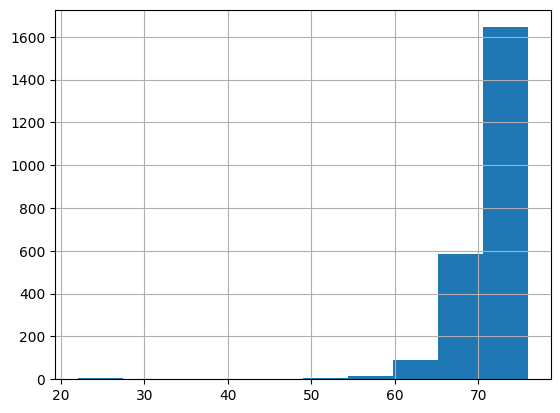

In [46]:
groep4DF_phonCompetence['pc_score'].hist()

# Summary Phonetic Competence in BasiScript

- One dictation of 25 words
- This dictation is written by 2351 different Groep 4 (grade 2, 8-9 years old) students
- The mean phonetic competence score is 71.29/76
